# Моделирование при проектировании информационных систем

### Выполнила: Копосова Дарья Андреевна
### М9121-09.04.04рпис

# Прведем анализ Второго датасета

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id='вступление'></a>
## Введение

>* Эта база данных содержит более 110 000 записей о приеме к врачу в медицинском центре в Бразилии.
>* Существует значительный процент людей, которые записываются на прием и не приходят на запланированную дату и время.
>* База данных содержит некоторую информацию о пациентах, такую как возраст, место жительства, его медицинское состояние (алкоголизм, диабет, гипертония и Инвалидность).
>* Нам необходимо проанализировать записи в этой базе данных, чтобы определить факторы, которые могут предсказать статус явки/неявки людей, которые бронируют встречи.

#### Вопросы:
>1. **Вопрос 1: ** Влияет ли день недели на неявку?
>2. **Вопрос 2: ** Влияет ли пол на неявку?
>3. **Вопрос 3: ** Влияет ли возраст на неявку?
>4. **Вопрос 4: ** Влияет ли состояние здоровья на неявку?
>5. **Вопрос 5: ** Какова процентная разница в неявке между здоровыми и Нездоровыми пациентами?
>6. **Вопрос 6: ** Влияет ли получение уведомления о массаже на неявку?
>7. **Вопрос 7: ** Имеет ли местоположение района отношение к неявке?


### Загрузка набора данных и импорт необходимых пакетов

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
        
df =  pd.read_csv('/content/drive/MyDrive/Магистратура /Обработка данных/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Перебор данных
### Общие свойства

In [3]:
##Проверка структуры набора данных:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
##проверка на наличие дублированных значений
df.duplicated().sum()


0

In [6]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

<font color ='Blue'>**Comment:**</font>
>1. We have <font color ='Blue'>no missing values</font> in the dataset!
>2. We have <font color ='Blue'>no duplicated</font> records 

In [7]:
# Проверка структуры данных
#установка десятичных знаков в Jupyter равным 2 для удобства чтения
pd.options.display.float_format='{:,.2f}'.format 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,"110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00"
mean,"147,496,265,710,394.06","5,675,305.12",37.09,0.10,0.20,0.07,0.03,0.02,0.32
std,"256,094,920,291,739.09","71,295.75",23.11,0.30,0.40,0.26,0.17,0.16,0.47
min,"39,217.84","5,030,230.00",-1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,172,614,444,192.00","5,640,285.50",18.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"31,731,838,713,978.00","5,680,573.00",37.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"94,391,720,898,175.00","5,725,523.50",55.00,0.00,0.00,0.00,0.00,0.00,1.00
max,"999,981,631,772,427.00","5,790,484.00",115.00,1.00,1.00,1.00,1.00,4.00,1.00


Комментарий:

Значения возраста содержат нули и отрицательные числа.

Значения гандикапа должны быть 1 или 0, но у него есть и другие значения (Макс =4)

Нам нужно проверить наличие избыточности в данных PatientID и AppointmentID

Нам нужно преобразовать ячейки даты и времени из Str в значение DateTime, чтобы мы могли его проанализировать.

#### Проверка данных о возрасте:


In [8]:
#проверка значений Age, поскольку он содержит нули и отрицательные числа
df['Age'].value_counts().sort_index( ascending = False )

 115       5
 102       2
 100       4
 99        1
 98        6
        ... 
 3      1513
 2      1618
 1      2273
 0      3539
-1         1
Name: Age, Length: 104, dtype: int64

Комментарии:

Существует только одно значение с отрицательным числом, это должно быть неправильное значение, и оно будет удалено.

Но значения 0 очень велики = 3539, поэтому это не должно быть неправильной записью, и она должна относиться к детям младше года.

In [9]:
# исправление проблемы с возрастными значениями
Age_problems =  df[df['Age'] < 0].index
df.drop(Age_problems, axis=0, inplace = True)

In [10]:
# # Подтверждение постоянного удаления строки
df.shape

(110526, 14)

#### Проверка данных:

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,"110,526.00","110,526.00","110,526.00","110,526.00","110,526.00","110,526.00","110,526.00","110,526.00","110,526.00"
mean,"147,493,384,515,987.12","5,675,304.22",37.09,0.10,0.20,0.07,0.03,0.02,0.32
std,"256,094,287,454,517.34","71,295.44",23.11,0.30,0.40,0.26,0.17,0.16,0.47
min,"39,217.84","5,030,230.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,172,535,777,719.00","5,640,285.25",18.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"31,731,838,713,978.00","5,680,572.00",37.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"94,389,629,939,367.00","5,725,522.75",55.00,0.00,0.00,0.00,0.00,0.00,1.00
max,"999,981,631,772,427.00","5,790,484.00",115.00,1.00,1.00,1.00,1.00,4.00,1.00


In [12]:
# # Handcap, проверяемый в словаре данных, имеет значение True или False (т.Е. 1 или 0 ).
# но в наборе данных он имеет разные значения (Min = 0 и Max = 4)
# мы собираемся исследовать это подробнее

df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [13]:
# похоже, что значения 2,3 и 4 - это разные обозначения для того, 
# чтобы быть ручным такси, а не ошибкой ввода

# мы собираемся скрыть 2,3,4 равным 1, поэтому все значения Handcap
# должны быть равны нулю для no и 1 для yes.

Hand_cap = df.query('Handcap > 1')
Hand_cap['Handcap'].count()

199

In [14]:
for i in range (2, 5):
    df['Handcap'].replace(i, 1, inplace =True)
df['Handcap'].value_counts()


0    108285
1      2241
Name: Handcap, dtype: int64

#### Проверка данных идентификатора пациента и данных идентификатора назначения

In [15]:
df['PatientId'].nunique(),  df['AppointmentID'].nunique()

(62298, 110526)

In [16]:
df['PatientId'].duplicated().sum() , df['AppointmentID'].duplicated().sum()

(48228, 0)

комментарии:

[[Идентификатор назначения] не имеет повторяющихся значений и может использоваться для индексации строк.
[[Идентификатор пациента] дублируется, и кажется, что у многих пациентов назначено более одного приема


#### Проверка данных о дате и времени и выполнение сегментации

In [17]:
# # Преобразование ScheduledDay и AppointmentDay в поля даты и времени
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

##Создание столбцов месяца, Дня недели для ScheduledDay:
df['Sch_day_year'] = df['ScheduledDay'].dt.year
df['Sch_day_month'] = df['ScheduledDay'].dt.month
df['Sch_day_day'] = df['ScheduledDay'].dt.day_name()

##Создание столбцов месяца, Дня недели для Дня назначения:
df['App_day_year'] = df['AppointmentDay'].dt.year
df['App_day_month'] = df['AppointmentDay'].dt.month
df['App_day_day'] = df['AppointmentDay'].dt.day_name()

df['App_day_month'].value_counts(), df['App_day_year'].value_counts()


(5    80841
 6    26450
 4     3235
 Name: App_day_month, dtype: int64, 2016    110526
 Name: App_day_year, dtype: int64)

<a id='eda'></a>
## Исследовательский Анализ Данных

> Теперь, когда вы обрезали и очистили свои данные, вы готовы перейти к исследованию. Вычисляйте статистику и создавайте визуализации с целью решения исследовательских вопросов, которые вы задали во введении. Рекомендуется, чтобы вы применяли систематический подход. Смотрите на одну переменную за раз, а затем следите за ней, рассматривая взаимосвязи между переменными.

#### Изучение описательных свойств набора данных:

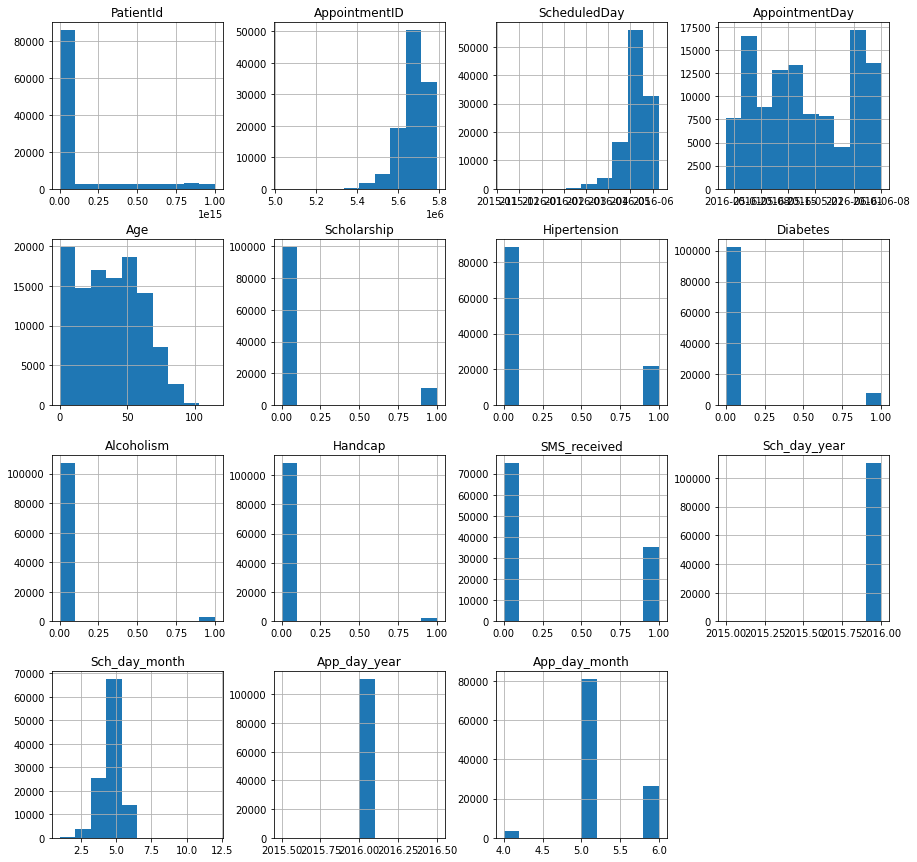

In [18]:
df.hist(figsize = (15,15));

#### Анализ процентного содержания каждого столбца критериев

In [19]:
# # Создание таблицы для распределения процентов от общего числа по всем параметрам пациентов
# создайте список желаемых имен столбцов
cloumns_list = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

perc_df= df[cloumns_list].apply(lambda x: x.value_counts(normalize = True)).mul(100).round(1).T.rename({0:'Special Parameter %' , 1:'No-Parameter %'}, axis =1)
perc_df

,Special Parameter %,No-Parameter %
Scholarship,90.20,9.80
Hipertension,80.30,19.70
Diabetes,92.80,7.20
Alcoholism,97.00,3.00
Handcap,98.00,2.00
SMS_received,67.90,32.10


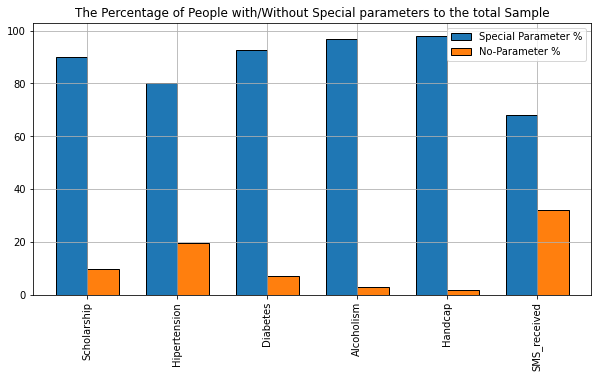

In [20]:
perc_df.plot.bar(edgecolor = 'black', figsize= (10,5), width = 0.7, grid= True, title= 'The Percentage of People with/Without Special parameters to the total Sample');

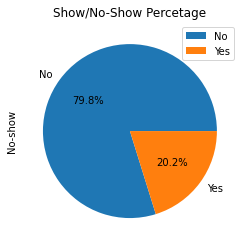

In [21]:
# Вычисление процента от показа до неявки:
df['No-show'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' , title= "Show/No-Show Percetage" , legend = True);

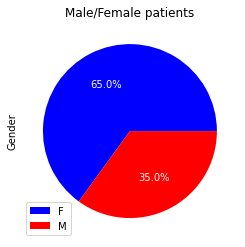

In [22]:
# Анализ процентной доли мужчин и женщин
df['Gender'].value_counts().plot(kind = 'pie',colors = ['blue', 'red'], autopct='%1.1f%%', textprops={'color':"w"}, title= "Male/Female patients" , legend = True);

In [23]:
# разделение пациентов на 2 группы в соответствии со статусом неявки
show_group = df[df['No-show'] == 'No']
no_show_group = df[df['No-show'] == 'Yes']
#Check
len(show_group) + len(no_show_group)


110526

#### Вопрос 1: Влияет ли день недели на неявку?

In [24]:
# # Вычисление процентной доли неявки за один Рабочий день
per_of_no_show= df[df['No-show'] == 'Yes'].groupby('No-show')['App_day_day'].value_counts(normalize =True).mul(100).to_frame().rename({'App_day_day':'% of No-Show'}, axis =1)
per_of_no_show

% of No-Show
No-show App_day_day              
Yes     Tuesday             23.08
        Wednesday           22.82
        Monday              21.01
        Friday              18.09
        Thursday            14.96
        Saturday             0.04

In [25]:
# Вычисление описательной статистики процента неявок
df[df['No-show'] == 'Yes'].groupby('No-show')['App_day_day'].value_counts(normalize =True).mul(100).to_frame().describe()

,App_day_day
count,6.00
mean,16.67
std,8.71
min,0.04
25%,15.74
50%,19.55
75%,22.37
max,23.08


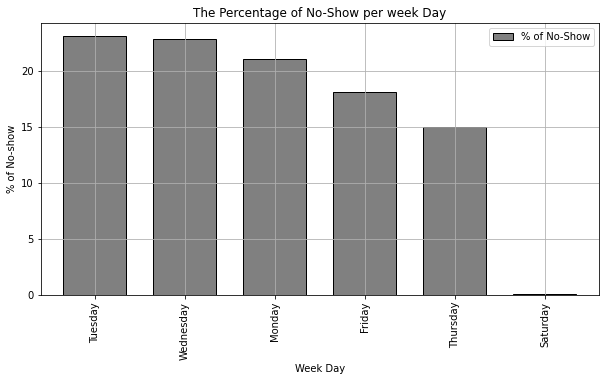

In [26]:
per_of_no_show.droplevel(level=0).plot.bar(edgecolor = 'black',color = 'gray', figsize= (10,5), width = 0.7, grid= True, title= 'The Percentage of No-Show per week Day' , xlabel = 'Week Day' , ylabel ='% of No-show');

Комментарии:

Средняя неявка в день = 16,67% при стандартном отклонении = 8,71%

Стандартное отклонение указывает на вариабельность неявки в будние дни

День недели является достоверным предиктором для объяснения процента неявок

В дни середины недели самый высокий процент неявок, в то время как в субботу практически нет никаких показов.

#### Вопрос 2 Влияет ли пол на неявку?

In [27]:
df =df.rename(columns ={'No-show': 'No_show'})
df['No_show'].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [28]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Sch_day_year,Sch_day_month,Sch_day_day,App_day_year,App_day_month,App_day_day
0,"29,872,499,824,296.00",5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,Friday,2016,4,Friday
1,"558,997,776,694,438.00",5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,Friday,2016,4,Friday
2,"4,262,962,299,951.00",5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,Friday,2016,4,Friday
3,"867,951,213,174.00",5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,Friday,2016,4,Friday
4,"8,841,186,448,183.00",5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,Friday,2016,4,Friday


In [29]:
# # Маскировка фрейма данных на 2 сегмента:
male_no_show = df.query('No_show == "Yes" and Gender == "M"')
female_no_show = df.query('No_show == "Yes" and Gender == "F"')

#Расчет процента неявки для мужчин и женщин
Perc_of_male_no_show = male_no_show['Gender'].count()/ df.shape[0]*100
Perc_of_female_no_show = female_no_show['Gender'].count()/ df.shape[0]*100

#печать результатов:
print('Количество неявившихся мужчин = {} от общего числа мужчин с процентом = {} % пациентов мужского пола '.format('{0:,.0f}'.format(male_no_show['Gender'].count()),'{0:.2f}'.format(Perc_of_male_no_show)))
print('Количество женщин, не явившихся = {} от общего числа женщин с процентом = {} % женщин-пациентов '.format('{0:,.0f}'.format(female_no_show['Gender'].count()),'{0:.2f}'.format(Perc_of_female_no_show)))


The count of Male with No-show = 7,725 of total males with a percentage = 6.99 % of Males patients 
The count of Female with No-show = 14,594 of total females with a percentage = 13.20 % of Females patients 


Комментарии:

Процент неявки у женщин почти вдвое превышает процент неявки у мужчин

#### Вопрос 3 Влияет ли возраст на неявку?

In [30]:
df['Age'].value_counts().sort_values()

99        1
102       2
100       4
115       5
98        6
       ... 
53     1651
49     1652
52     1746
1      2273
0      3539
Name: Age, Length: 103, dtype: int64

In [31]:
age_bins =[]

for i in range(0,df['Age'].max()+1,5):
    age_bins.append(i)

#создание имен ячеек
bin_names = [] #age_bins[1:]
for i in range(5,max(age_bins)+1,5):
    bin_names.append("<="+ str(i))

bin_names
#Создание нового столбца в фрейме данных для Age_cat: 
df['Age_cat'] = pd.cut(df['Age'], age_bins, labels = bin_names , include_lowest = True)
    
    

In [32]:
# проверка
df.groupby('Age_cat')['Age'].count().sum()

110526

In [33]:
# # Создание маски для неявившихся пациентов с их полем Age_cat
no_show_group = df[df['No_show'] == 'Yes']
no_show_age_df = no_show_group.groupby('Age_cat' )['Age'].count().to_frame()
no_show_age_df.rename(columns ={'Age' : 'count'}, inplace = True)

# Вычисление общего количества неявившихся пациентов
y_values_total = no_show_age_df.sum(axis =0)

# Добавление нового столбца для процента неявившихся пациентов для каждого Age_cat
no_show_age_df['Perc_of_total'] = no_show_age_df.iloc[:,0].to_frame() / y_values_total*100
no_show_age_df = no_show_age_df.reset_index()

no_show_age_df

,Age_cat,count,Perc_of_total
0,<=5,2185,9.79
1,<=10,1603,7.18
2,<=15,1460,6.54
3,<=20,1848,8.28
4,<=25,1722,7.72
5,<=30,1672,7.49
6,<=35,1610,7.21
7,<=40,1622,7.27
8,<=45,1460,6.54
9,<=50,1410,6.32


In [34]:
no_show_age_df.describe()

,count,Perc_of_total
count,23.00,23.00
mean,970.39,4.35
std,736.25,3.30
min,0.00,0.00
25%,203.50,0.91
50%,"1,297.00",5.81
75%,"1,606.50",7.20
max,"2,185.00",9.79


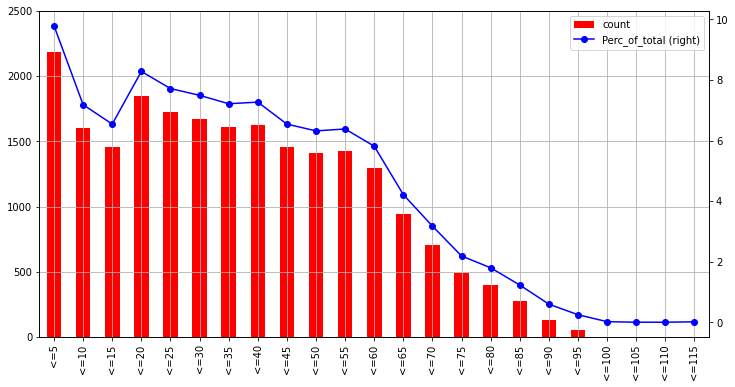

In [35]:
x_names = no_show_age_df['Age_cat'].tolist()
series_1 = no_show_age_df['count'].tolist()
series_2 = no_show_age_df['Perc_of_total'].tolist()

graph_df = pd.DataFrame({'count': series_1,'Perc_of_total': series_2 }, index = x_names)

fig, ax = plt.subplots()

# Постройте первые оси x и y:
graph_df.plot(use_index=True, kind='bar', y='count', ax=ax, color='red',ylim=(0,2500), figsize = (12,6), rot = 90 , grid = True)

# Постройте вторую ось x и y.
# По secondary_y = True запрашивается вторая ось y
graph_df.plot(use_index=True, y='Perc_of_total', ax=ax, secondary_y=True,marker='o', color='blue', figsize = (12,6), rot =90, grid = True)
plt.show()

Комментарии:

Пациенты были сгруппированы по возрастным категориям (каждые 5 лет в каждой категории)

Средний процент неявок для всех возрастов составил = 3,45% (со стандартным отклонением = 3,30)

Максимальный процент неявок был среди возрастной категории [>=5 лет] : 9,79%

График показывает, что процент неявки уменьшается с увеличением возрастной категории

У пожилых граждан (возрастная категория > 50 лет) самый низкий процент неявки

####Вопрос 4: Влияет ли состояние здоровья на неявку?

у нас есть 4 медицинских состояния:

Гипертония
Диабет
Алкоголизм
Помеха

<h4 style = 'text-align: center;'>1/4. Гипертония</h1>

In [36]:
def proportion(column_name):
'''
эта функция создает маску набора данных с условием (выбранные критерии = 1)
затем он печатает сводку по количеству показов/неявок пациентов с выбранными критериями
затем он связывает 2 графика:
Первый график - это столбчатая диаграмма для подсчета явившихся и неявившихся пациентов
Второй график представляет собой круговую диаграмму для процентного соотношения явившихся и неявившихся пациентов из
выбранной группы пациентов с выбранными критериями

вход:
допустимое имя столбца из набора данных

выход:
Сводная таблица количества показов/неявок
Столбчатая диаграмма для подсчета показов/неявок
Круговая диаграмма для показа/неявки % от общей выбранной группы
'''
    try:
        #Creating a maksed dataframe with column_name = 1
        factor_group = df[df[column_name] == 1 ]
        # Getting the count of the 1 & 0 of the selected column_name
        factor_grp_tbl = factor_group.groupby('No_show')['No_show'].value_counts()
        # Converting the resulted Pandas Series into DataFrame
        df_factor_grp_tbl = pd.DataFrame(factor_grp_tbl)
        # Dropping the old index 
        df_factor_grp_tbl.reset_index(drop= True, inplace= True)
        # Creating new index with the desired desription
        df_factor_grp_tbl.rename(columns ={'No_show' : 'count'},index ={ 0:'Show',1:'No-show'}, inplace = True)
        title_1 = str(column_name)+"Show/No-Show Count"
        title_2 = column_name +"Show/No-Show Percentage"
        factor_grp_tbl.plot(kind = 'bar', title= title_1, grid = True  , 
                             xlabel ='Response' , ylabel ='Count', legend =False) ;
        plt.show()
        factor_grp_tbl.plot(subplots=True,kind = 'pie', figsize =(6,6),autopct='%1.1f%%' , 
                            title= title_2 , legend = True);
        plt.show()
        print("The Count of patients with",column_name ,"and their Show/No-show status: \n {}".format(df_factor_grp_tbl))
        return proportion;
    except Exception as error:
        print("Please Enter a Valid Column Name from the Dataset")

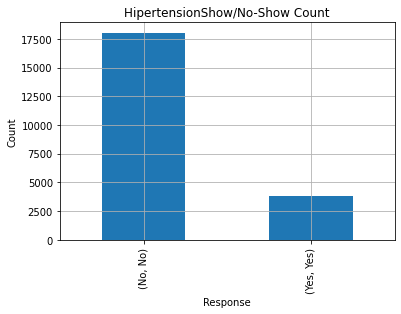

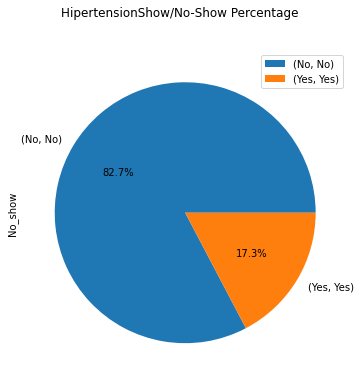

The Count of patients with Hipertension and their Show/No-show status: 
          count
Show     18029
No-show   3772


<function __main__.proportion(column_name)>

In [37]:
proportion('Hipertension')

<h4 style = 'text-align: center;'>2/4. Диабет</h1>

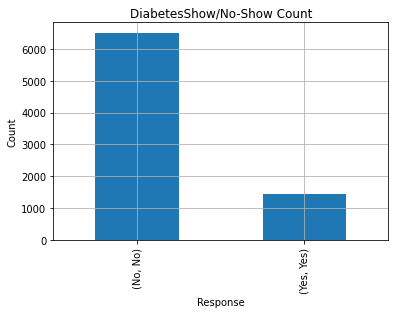

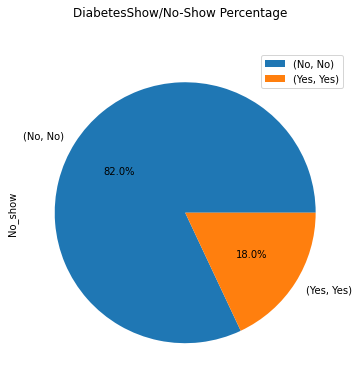

The Count of patients with Diabetes and their Show/No-show status: 
          count
Show      6513
No-show   1430


<function __main__.proportion(column_name)>

In [38]:
# Изучение связи между неявкой и пациентами с диабетом:
proportion('Diabetes')

<h4 style = 'text-align: center;'>3/4. Алкоголизм</h1>

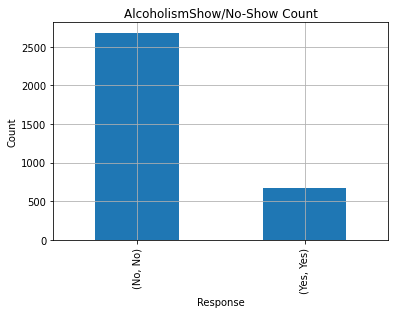

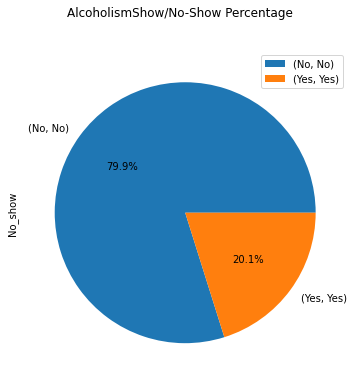

The Count of patients with Alcoholism and their Show/No-show status: 
          count
Show      2683
No-show    677


<function __main__.proportion(column_name)>

In [39]:
# Изучение связи между неявкой и пациентами, страдающими алкоголизмом:
proportion('Alcoholism')

<h4 style = 'text-align: center;'>4/4. Handcap</h1>

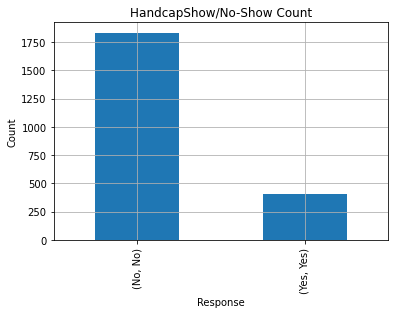

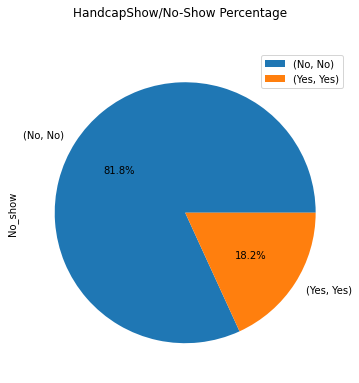

The Count of patients with Handcap and their Show/No-show status: 
          count
Show      1834
No-show    407


<function __main__.proportion(column_name)>

In [40]:
# Изучение связи между неявкой и пациентами, страдающими алкоголизмом:
proportion('Handcap')

<font color ='Blue'>**Comments:**</font>
> The 4 medical conditions showed relatively same Percentage of No_Show :

     
Комментарии:

4 медицинских состояния показали относительно одинаковый процент No_Show :

     1. Hypertension 17.3%

     2. Diabetes 18.0%

     3. Alcoholisz 20.1%

     4. Handcap 18.2%

Эти значения близки к среднему показателю неявки в день = 20,7% (рассчитано ранее)

#### Вопрос 5: Какова процентная разница в неявке между здоровыми и Нездоровыми пациентами?


In [46]:
Healthy = df.query('Hipertension != 1 & Diabetes !=1 & Alcoholism != 1 & Handcap != 1')
Non_healthy = df.query('Hipertension != 0 or Diabetes !=0 or Alcoholism != 0 or Handcap != 0')

In [47]:
# подтверждение правильности размеров
Healthy.shape , Non_healthy.shape

((84114, 21), (26412, 21))

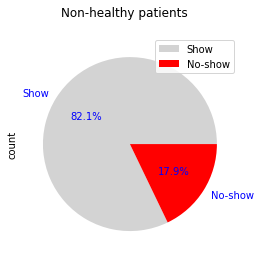

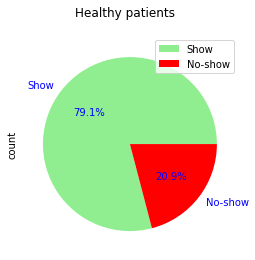

In [48]:
healthy_plot = Healthy.groupby('No_show')['No_show'].value_counts()
non_healthy_plot = Non_healthy.groupby('No_show')['No_show'].value_counts()

# # Преобразование результирующей серии Pandas в фрейм данных
df_healthy_plot = pd.DataFrame(healthy_plot)
df_non_healthy_plot = pd.DataFrame(non_healthy_plot)

# Удаление старого индекса
df_healthy_plot.reset_index(drop= True, inplace= True)
df_non_healthy_plot.reset_index(drop= True, inplace= True)

# # Создание нового индекса с желаемым описанием
df_healthy_plot.rename(columns ={'No_show' : 'count'},index ={ 0:'Show',1:'No-show'}, inplace = True)
df_non_healthy_plot.rename(columns ={'No_show' : 'count'},index ={ 0:'Show',1:'No-show'}, inplace = True)

df_non_healthy_plot.plot(kind = 'pie',colors = ['lightgray', 'red'], autopct='%1.1f%%',subplots=True, textprops={'color':"b"}, title= "Non-healthy patients" , legend = True);
plt.show()
df_healthy_plot.plot(kind = 'pie',colors = ['lightgreen', 'red'], autopct='%1.1f%%',subplots=True, textprops={'color':"b"}, title= "Healthy patients" , legend = True);
plt.show()

Комментарии:

У здоровых пациентов на 3% больше неявок, чем у нездоровых пациентов

Этот анализ вместе с анализом нездоровых пациентов подтверждает, что хронические заболевания (гипертония, Диабет, алкоголизм и Ручная каша) не являются эффективным фактором в проценте неявок пациентов.

#### Вопрос 6: Влияет ли получение уведомления на неявку?


In [49]:
sms_patients = df[df['SMS_received'] == 1 ]
sms_patients.shape

(35482, 21)

In [50]:
sms_grp_tbl  = sms_patients.groupby('No_show')['No_show'].value_counts()
df_sms_grp_tbl = pd.DataFrame(sms_grp_tbl)
df_sms_grp_tbl.reset_index(drop= True, inplace= True)
df_sms_grp_tbl.rename(columns ={'No_show' : 'count'},index ={ 0:'Show',1:'No-show'}, inplace = True)
df_sms_grp_tbl

,count
Show,25698
No-show,9784


In [51]:
# Вычисление пропорций:
sms_grp_show = df_sms_grp_tbl.iloc[0:2,0:1] / sms_patients.shape[0] *100
# sms_grp_no_show = sms_grp_tbl.iloc[1:2,1:2].sum()
# sms_gro_total = sms_grp_tbl.iloc[0:2,1:2].sum()
df_sms_grp_tbl['Perc_of_total'] = sms_grp_show
df_sms_grp_tbl

,count,Perc_of_total
Show,25698,72.43
No-show,9784,27.57


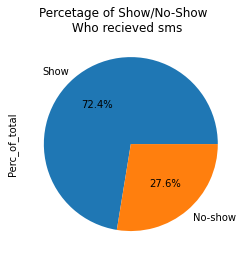

In [53]:
df_sms_grp_tbl.Perc_of_total.plot(kind = 'pie' ,autopct='%1.1f%%',subplots=True , title="Percetage of Show/No-Show \n Who recieved sms" );

Комментарии:

Отправка sms не была определяющим фактором в снижении процента неявок.

на самом деле анализ показывает больший процент неявок среди пациентов, получивших sms.

#### Вопрос 7: Имеет ли местоположение района отношение к неявке??

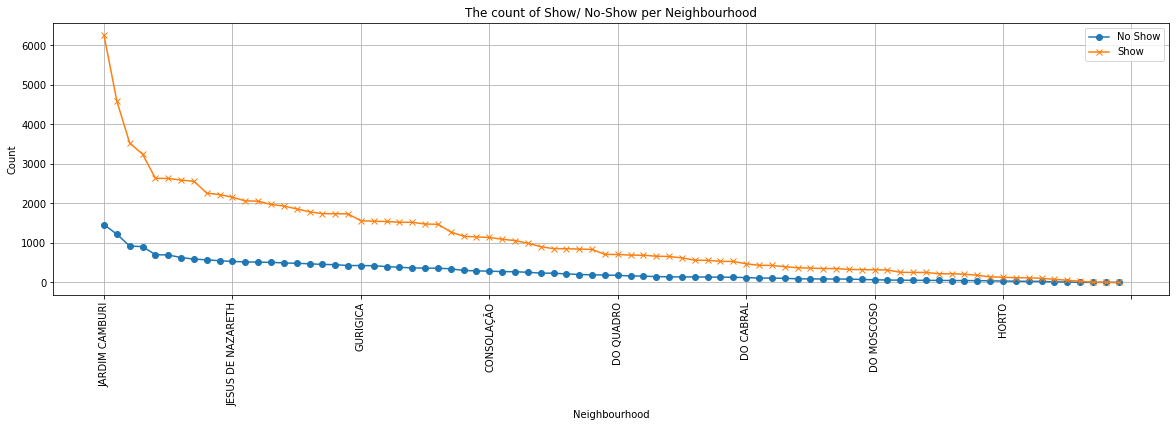

In [54]:
count_no_show = df[df['No_show'] == 'Yes']['Neighbourhood'].value_counts()
count_show = df[df['No_show'] == 'No']['Neighbourhood'].value_counts()

count_no_show.plot(figsize =(20,5),marker='o', grid = True , rot= 90 , ylabel ='Count');
count_show.plot(figsize =(20,5), marker='x' ,grid = True , rot= 90, xlabel ='Neighbourhood');
plt.legend(['No Show', 'Show']);
plt.title("The count of Show/ No-Show per Neighbourhood");

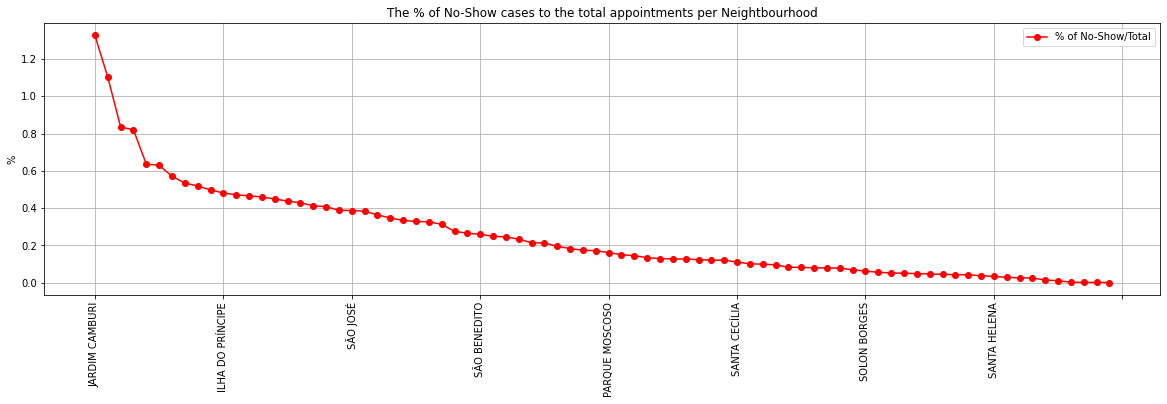

In [55]:
per_no_show_nightbourhood = count_no_show / df.shape[0]*100
per_no_show_nightbourhood.plot(figsize =(20,5),marker='o', grid = True , color ='red', rot= 90 , ylabel ='%');
plt.legend(['% of No-Show/Total']);
plt.title("The % of No-Show cases to the total appointments per Neightbourhood");

Комментарии:

База данных содержит 160 различных районов

Совершенно очевидно, что в некоторых районах показатель неявки намного выше, чем в других

Местоположение района является действительным фактором для прогнозирования вероятности неявки

<a id='летний'></a>
## Результаты :

#### **Вопрос 1: ** Влияет ли день недели на неявку?
>1. Средняя неявка в день = 16,67% при стандартном отклонении = 8,71%
>2. Стандартное отклонение указывает на **изменчивость** неявки по дням недели
>3. **День недели** <цвет шрифта ='Красный'>является допустимым показателем</font> для объяснения процента **неявок**
>4. В дни середины недели самый высокий процент неявок, в то время как в субботу случаев неявки практически нет.

#### **Вопрос 2: ** Влияет ли пол на неявку?
>1. Процент неявки у **Женщин** почти <цвет шрифта ='Красный'>__двойной__</font> процент неявки у ** Мужчин**

#### **Вопрос 3: ** Влияет ли возраст на неявку?
>1. Пациенты были сгруппированы по возрастным категориям (каждые 5 лет в каждой категории)
>2. **Средний** процент неявок для всех возрастов составил = **3,45%** (со стандартным отклонением = **3.30** )
>3. **Максимальный процент неявки** был среди возрастной категории **[>=5 лет] : 9,79%**
>4. График показывает, что процент неявок <цвет шрифта ='Красный'>__уменьшается__</font> по мере увеличения возрастной категории ____
>5. Пожилые люди (возрастная категория > 50 лет) имеют **самый низкий ** процент неявки

#### **Вопрос 4: ** Влияет ли состояние здоровья на неявку?
> 4 медицинских состояния показали относительно одинаковый процент No_Show :
> 1. Гипертония &ensp; 17.3%
> 2. Диабет &emsp;&emsp;&emsp; 18,0%
> 3. Алкоголизм &nbsp;&emsp;&emsp; 20.1%
> 4. Наручник &nbsp;&ensp;&emsp;&emsp; 18.2%

> <цвет шрифта ='синий'>Эти значения близки к среднему показателю неявки в день = 20,7% (рассчитано ранее)</font>

#### **Вопрос 5: ** Какова процентная разница в неявке между здоровыми и Нездоровыми пациентами?
>1. **Здоровые пациенты** показаны <цвет шрифта ='Красный'>**3% неявок**</font> больше, чем **Нездоровые пациенты**
>2. Этот анализ с анализом нездоровых пациентов подтверждает, что хронические состояния (Гипертензия, Диабет, алкоголизм и Ручная повязка) являются ** неэффективным фактором ** в процентах неявок пациентов.
#### **Вопрос 6: ** Влияет ли получение уведомления о массаже на неявку?
>1. Отправка sms <цвет шрифта ='Красный'> не была</font> определяющим фактором в снижении процента неявок.
>2. на самом деле анализ показывает больший процент неявок среди пациентов, получивших sms.

#### **Вопрос 7: ** Имеет ли местоположение района отношение к неявке?
>1. База данных содержит 160 различных районов
>2. __Совершенно очевидно, что в некоторых районах коэффициент неявки намного выше, чем в других__
>3. <цвет шрифта ='Красный'>Местоположение района является **допустимым фактором** для прогнозирования вероятности неявки</font>



<a id='выводы'></a>
## Заключение:
> 1. средний процент неявок в день составляет 20,7% с низким стандартным отклонением, что отражает его стабильность.
> 2. Ни одна переменная не показала положительного эффекта при прогнозировании процента неявок
> 3. Женщины показывают вдвое больший процент неявки, чем мужчины
> 4. Возраст показал отрицательную пропорциональную зависимость с процентом неявки
> 5. Наличие хронического заболевания не влияет на процент неявок
> 6. Отправка sms-напоминания госпредприятиям не влияет на процент неявок
> 7. В некоторых районах проживания пациентов процент неявок был выше, чем в других, но нет данных о расстоянии или трафике, чтобы проанализировать, почему.

<a id='ограничение'></a>
## Ограничения:
> 1. Набор данных содержит очень неоднородные записи всего за 3 месяца 2016 года (80841 в мае, 26450 в июне и 3235 в апреле). Что в значительной степени ограничивает надежность анализа.
> 2. Расстояния между районами не регистрируются, поэтому мы не можем связать вероятность неявки в разных районах с расстоянием или какими-либо другими причинами.
>3. Данные о назначении не включают часы, что может быть решающим фактором при прогнозировании процента явки/неявки, поскольку количество назначений врача в течение обычного рабочего дня ограничено более высоким процентом неявки.
>4. имеется 3539 случаев с возрастом= 0 , который был интерпретирован как дети в возрасте до 1 года.

